##Seattle data

Questions:

1. The average price of the type of property rented.
2. Level of satisfaction regarding the number of bathrooms.
3. The average amount spent depends on the region of origin of the host.



LIBS

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

Reading Files

In [24]:
file = "listings.csv"
df = pd.read_csv(file)

In [25]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,53939356,https://www.airbnb.com/rooms/53939356,20220918143902,2022-09-18,city scrape,FIR - Large Private room in Lake Forest with sink,Enjoy easy access to everything from this cent...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,435279521,...,4.78,4.33,4.44,NaN,t,7,0,7,0,2.52
1,630392837253856994,https://www.airbnb.com/rooms/630392837253856994,20220918143902,2022-09-18,city scrape,"Water-view retreat with deck, grill, paddleboa...",<b>The space</b><br />Lake View Retreat<br /><...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,104834083,...,4.50,4.50,4.50,NaN,t,46,46,0,0,1.50
2,19553441,https://www.airbnb.com/rooms/19553441,20220918143902,2022-09-18,city scrape,ALKI BEACH-AMAZING SEATTLE STEPS 2 BEACH/BOARD...,MESSAGE ME IF HOME IS NOT AVAILABLE. I HAVE 2 ...,Alki Beach is the most beautiful neighborhood ...,https://a0.muscache.com/pictures/126b8988-e6a0...,25383292,...,5.00,5.00,4.90,STR-OPLI-20-000201,f,2,2,0,0,0.32
3,599272579997904543,https://www.airbnb.com/rooms/599272579997904543,20220918143902,2022-09-18,city scrape,Spacious 2-Bed Home with Backyard,Bring the whole family to this great place wit...,Tucked away in quite Tukwila with views of Fos...,https://a0.muscache.com/pictures/miso/Hosting-...,33439044,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
4,606740310546802034,https://www.airbnb.com/rooms/606740310546802034,20220918143902,2022-09-18,city scrape,Family-friendly home w/ fast wifi & a large yard,Relax with the whole family at this peaceful h...,The Ridgecrest neighborhood of Shoreline is ju...,https://a0.muscache.com/pictures/miso/Hosting-...,121968404,...,5.00,4.86,5.00,NaN,f,1,1,0,0,2.47


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5904 entries, 0 to 5903
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5904 non-null   int64  
 1   listing_url                                   5904 non-null   object 
 2   scrape_id                                     5904 non-null   int64  
 3   last_scraped                                  5904 non-null   object 
 4   source                                        5904 non-null   object 
 5   name                                          5904 non-null   object 
 6   description                                   5894 non-null   object 
 7   neighborhood_overview                         4337 non-null   object 
 8   picture_url                                   5904 non-null   object 
 9   host_id                                       5904 non-null   i

In [27]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5.904000e+03,5.904000e+03,5.904000e+03,5904.000000,5904.000000,5904.000000,5904.000000,5904.000000,0.0,5206.000000,...,5031.000000,5031.000000,5031.000000,5031.000000,5031.00000,5904.000000,5904.000000,5904.000000,5904.000000,5034.000000
mean,1.558024e+17,2.022092e+13,1.211688e+08,321.230352,373.797934,47.622645,-122.332433,3.949695,NaN,1.752401,...,4.802425,4.877152,4.863856,4.837539,4.71057,33.068767,31.913787,1.144986,0.009654,2.423584
std,2.742285e+17,0.000000e+00,1.392807e+08,1011.395824,1130.088599,0.054688,0.035003,2.468437,NaN,1.040565,...,0.330726,0.290193,0.324071,0.256421,0.36141,89.627522,89.710868,3.779585,0.152037,2.124262
min,6.606000e+03,2.022092e+13,2.536000e+03,1.000000,1.000000,47.481210,-122.420700,0.000000,NaN,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.263452e+07,2.022092e+13,1.455297e+07,1.000000,1.000000,47.593915,-122.355748,2.000000,NaN,1.000000,...,4.750000,4.880000,4.875000,4.800000,4.65000,1.000000,1.000000,0.000000,0.000000,0.700000
50%,4.657232e+07,2.022092e+13,6.083099e+07,3.000000,4.000000,47.621332,-122.331840,4.000000,NaN,1.000000,...,4.910000,4.960000,4.960000,4.910000,4.80000,2.000000,1.000000,0.000000,0.000000,1.910000
75%,5.425120e+07,2.022092e+13,1.740601e+08,15.000000,20.000000,47.663258,-122.309094,5.000000,NaN,2.000000,...,4.990000,5.000000,5.000000,4.980000,4.90000,10.000000,7.000000,0.000000,0.000000,3.590000
max,7.174934e+17,2.022092e+13,4.798081e+08,4075.000000,4399.000000,47.748000,-122.223080,16.000000,NaN,8.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,369.000000,369.000000,30.000000,4.000000,17.680000


In [28]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [29]:
df.corr()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,1.000000,NaN,0.283502,0.156988,0.167076,-0.036948,-0.006965,0.048876,NaN,0.069272,...,0.000014,-0.048421,-0.037715,-0.089346,-0.047670,0.139502,0.141070,-0.038912,-0.033174,0.206983
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.283502,NaN,1.000000,-0.020899,-0.012024,-0.053546,0.035729,0.091657,NaN,0.070176,...,-0.035933,-0.097752,-0.085192,-0.087563,-0.096468,-0.038392,-0.036309,-0.047470,-0.031113,0.140450
host_listings_count,0.156988,NaN,-0.020899,1.000000,0.991745,-0.024786,-0.028113,-0.161033,NaN,-0.095113,...,-0.020493,-0.245970,-0.234085,-0.149885,-0.216376,0.968610,0.971313,-0.084691,-0.019763,-0.169838
host_total_listings_count,0.167076,NaN,-0.012024,0.991745,1.000000,-0.023813,-0.026915,-0.160715,NaN,-0.092234,...,-0.024670,-0.249847,-0.237966,-0.148080,-0.223506,0.941852,0.944678,-0.086986,-0.020391,-0.179956
latitude,-0.036948,NaN,-0.053546,-0.024786,-0.023813,1.000000,-0.203136,-0.044342,NaN,-0.020209,...,-0.028915,0.010663,-0.012705,0.092197,-0.047082,-0.006418,-0.007206,0.019347,-0.012158,-0.075415
longitude,-0.006965,NaN,0.035729,-0.028113,-0.026915,-0.203136,1.000000,0.022003,NaN,0.040148,...,-0.102428,-0.035841,-0.050936,-0.123461,-0.056137,-0.012672,-0.017324,0.111096,-0.009395,-0.053168
accommodates,0.048876,NaN,0.091657,-0.161033,-0.160715,-0.044342,0.022003,1.000000,NaN,0.859415,...,-0.020413,0.019221,0.018299,0.009910,-0.007035,-0.147457,-0.141078,-0.145497,-0.062352,-0.002286
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,0.069272,NaN,0.070176,-0.095113,-0.092234,-0.020209,0.040148,0.859415,NaN,1.000000,...,-0.020046,0.041384,0.016962,0.004266,-0.005645,-0.091879,-0.085679,-0.132193,-0.048919,-0.061056


##First question

In [30]:
df_pp = df[['price','property_type']]

In [31]:
df_pp.dtypes

price            object
property_type    object
dtype: object

In [32]:
df_pp.head()

,price,property_type
0,$42.00,Private room in home
1,$194.00,Entire rental unit
2,$595.00,Entire home
3,$300.00,Entire home
4,$248.00,Entire home


In [33]:
df_pp['price'] = df_pp['price'].apply(lambda x: float(x.split()[0].replace('$', '').replace(',', '')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df_pp.head()

,price,property_type
0,42.0,Private room in home
1,194.0,Entire rental unit
2,595.0,Entire home
3,300.0,Entire home
4,248.0,Entire home


In [35]:
df_ppm = df_pp.groupby("property_type")['price'].mean().round(2).to_frame()

In [82]:
df_ppm.tail()

,price
property_type,
Shared room in home,86.33
Shared room in loft,80.00
Shared room in rental unit,69.75
Shared room in townhouse,52.00
Tiny home,114.90


In [37]:
higher = df_ppm[df_ppm['price'] > df_ppm['price'].mean()].sort_values(by='price', ascending=False).reset_index()

In [38]:
property_name_h = list(higher['property_type'][:4])
price_h = list(higher['price'][:4])

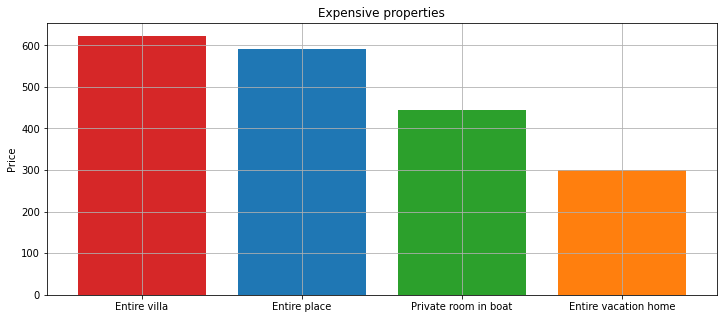

In [39]:
fig, ax = plt.subplots(figsize = (12,5))

bar_labels = ['red', 'blue', 'green', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(property_name_h, price_h, color=bar_colors)

ax.set_ylabel('Price')
ax.set_title('Expensive properties')
plt.grid()
plt.show()

In [40]:
lower = df_ppm[df_ppm['price'] < df_ppm['price'].mean()].sort_values(by='price', ascending=True).reset_index()

In [41]:
property_name_l = list(lower['property_type'][:4])
property_name_l.reverse()
price_l = list(lower['price'][:4])
price_l.reverse()

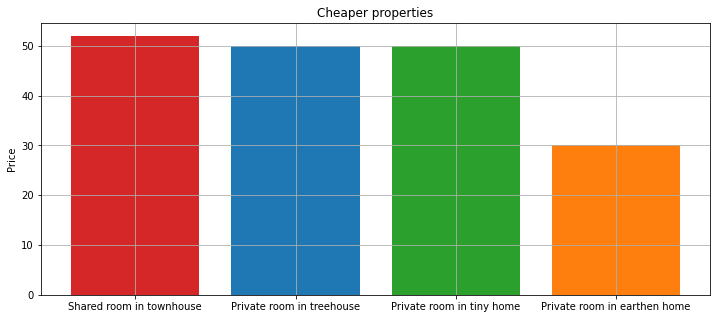

In [42]:
fig, ax = plt.subplots(figsize = (12,5))

bar_labels = ['red', 'blue', 'green', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(property_name_l, price_l, color=bar_colors)

ax.set_ylabel('Price')
ax.set_title('Cheaper properties')
plt.grid()
plt.show()

In [43]:
price = price_h + price_l
property_name = property_name_h + property_name_l

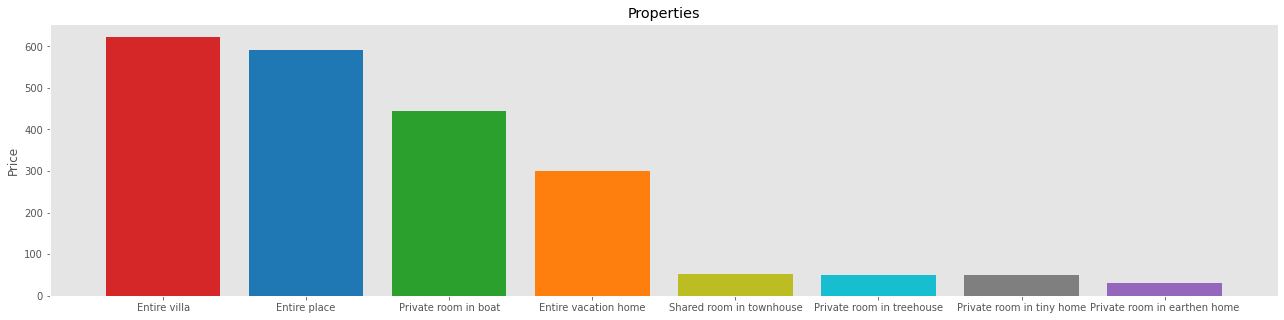

In [83]:
fig, ax = plt.subplots(figsize = (22,5))

bar_labels = ['red', 'blue', 'green', 'orange', 'olive', 'cyan', 'gray', 'purple']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:olive', 'tab:cyan', 'tab:gray', 'tab:purple']

ax.bar(property_name, price, color=bar_colors)

ax.set_ylabel('Price')
ax.set_title('Properties')
plt.grid()
plt.show()

In [45]:
df_ppm[df_ppm.price == df_ppm.price.max()]

,price
property_type,
Entire villa,622.6


In [46]:
df_ppm[df_ppm.price == df_ppm.price.min()]

,price
property_type,
Private room in earthen home,30.0


##Second question

In [47]:
df_br = df[["bathrooms_text","review_scores_rating"]]

In [48]:
df_br.head()

,bathrooms_text,review_scores_rating
0,2 shared baths,4.33
1,1 bath,4.50
2,3 baths,5.00
3,1 bath,NaN
4,2 baths,4.86


In [49]:
df_br.groupby('bathrooms_text')['review_scores_rating'].mean().round(2)

bathrooms_text
0 baths              4.60
0 shared baths       4.81
1 bath               4.77
1 private bath       4.79
1 shared bath        4.73
1.5 baths            4.81
1.5 shared baths     4.75
16 shared baths      4.74
2 baths              4.78
2 shared baths       4.65
2.5 baths            4.81
2.5 shared baths     4.72
3 baths              4.81
3 shared baths       4.81
3.5 baths            4.81
3.5 shared baths     4.90
4 baths              4.86
4 shared baths       4.80
4.5 baths            4.81
6 baths              4.98
Half-bath            4.75
Private half-bath     NaN
Shared half-bath     4.88
Name: review_scores_rating, dtype: float64

In [50]:
df_br = df_br.apply(lambda x: x.astype(str).str.lower())
df_br['review_scores_rating'] = pd.to_numeric(df_br['review_scores_rating'], errors='coerce')

In [51]:
df_brs = (df_br[df_br['bathrooms_text'].str.contains('shared') == True]).reset_index(drop=True)

In [52]:
df_brs = df_brs.groupby('bathrooms_text').mean().round(2).sort_values(by='review_scores_rating', ascending=False)

In [53]:
df_brn = (df_br[df_br['bathrooms_text'].str.contains('shared') == False]).reset_index(drop=True)

In [54]:
df_brn = df_brn.groupby('bathrooms_text').mean().round(2).sort_values(by='review_scores_rating', ascending=False)

In [55]:
register = df_br['bathrooms_text'].value_counts().to_frame()

In [56]:
register.head()

,bathrooms_text
1 bath,3460
2 baths,800
1 shared bath,326
1 private bath,292
2.5 baths,280


In [57]:
df_br = df_br.groupby('bathrooms_text').mean().round(2).sort_values(by='review_scores_rating', ascending=False)

In [58]:
df_br.head()

,review_scores_rating
bathrooms_text,
6 baths,4.98
3.5 shared baths,4.90
shared half-bath,4.88
4 baths,4.86
0 shared baths,4.81


In [59]:
df_brq = pd.concat([df_br, register], axis=1).reset_index()

In [60]:
df_brq.rename(columns={'bathrooms_text':'register_count', 'index':'bathrooms_text'}, inplace=True)

In [61]:
df_brq.head()

,bathrooms_text,review_scores_rating,register_count
0,6 baths,4.98,3
1,3.5 shared baths,4.90,4
2,shared half-bath,4.88,1
3,4 baths,4.86,17
4,0 shared baths,4.81,8


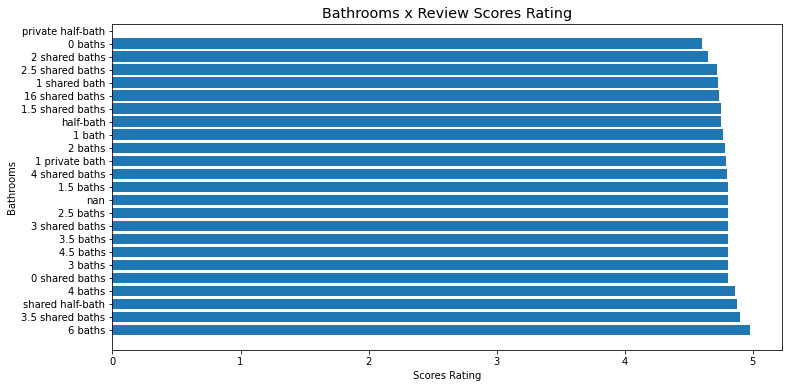

In [62]:
fig, ax = plt.subplots(figsize = (12,6))
plt.style.use('ggplot')

plt.barh(df_brq['bathrooms_text'],df_brq['review_scores_rating'])
plt.title('Bathrooms x Review Scores Rating')
plt.ylabel('Bathrooms')
plt.xlabel('Scores Rating')
plt.show()

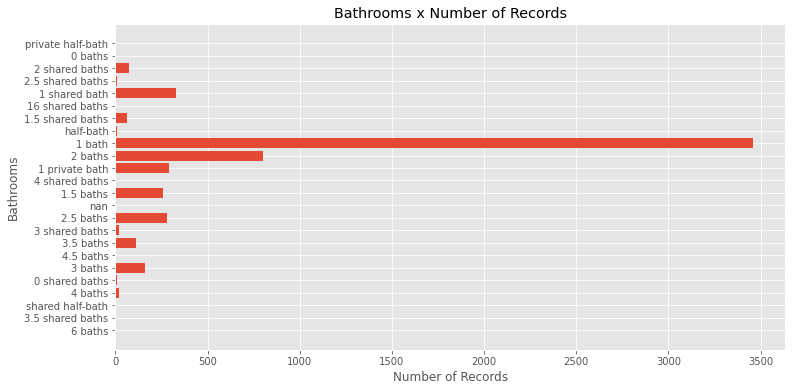

In [63]:
fig, ax = plt.subplots(figsize = (12,6))
plt.style.use('ggplot')

plt.barh(df_brq['bathrooms_text'],df_brq['register_count'])
plt.title('Bathrooms x Number of Records')
plt.ylabel('Bathrooms')
plt.xlabel('Number of Records')
plt.show()

## Third question

In [64]:
df_hp = df[['host_location','price']]

In [65]:
df_hp.head()

,host_location,price
0,"Lake Forest Park, WA",$42.00
1,NaN,$194.00
2,"Seattle, WA",$595.00
3,"Seattle, WA",$300.00
4,"Seattle, WA",$248.00


In [66]:
df_hp.dtypes

host_location    object
price            object
dtype: object

In [67]:
df_hp['price'] = df_hp['price'].apply(lambda x: float(x.split()[0].replace('$', '').replace(',', '')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
df_hp.dropna(subset=['host_location'], axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [69]:
df_hpm = df_hp.groupby('host_location')['price'].mean().round(2).to_frame()

In [70]:
register = df_hp['host_location'].value_counts().to_frame()

In [71]:
register.rename(columns={'host_location':'record_amount'},inplace=True)

In [72]:
df_hpmq = pd.concat([df_hpm, register], axis=1).reset_index()

In [73]:
df_hpmq.rename(columns={'index':'host_location'}, inplace=True)

In [74]:
df_hpmq.head()

,host_location,price,record_amount
0,"Amsterdam, Netherlands",110.75,4
1,"Anchorage, AK",266.00,1
2,"Ann Arbor, MI",485.00,1
3,"Antelope, CA",167.00,1
4,"Arizona, United States",347.00,1


In [75]:
df_hpmqh = df_hpmq[df_hpmq['price'] > 350].sort_values(by='price', ascending=False)

In [76]:
df_hpmqh = df_hpmqh.sort_values(by='price', ascending=False)

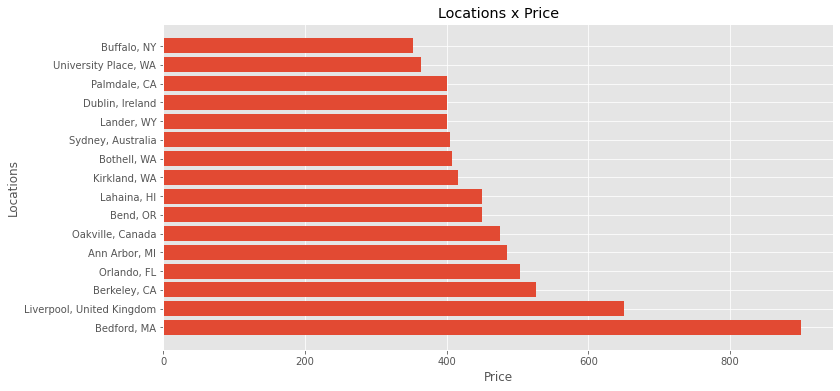

In [77]:
fig, ax = plt.subplots(figsize = (12,6))
plt.style.use('ggplot')

plt.barh(df_hpmqh['host_location'],df_hpmqh['price'])
plt.title('Locations x Price')
plt.ylabel('Locations')
plt.xlabel('Price')
plt.show()

In [78]:
df_hpmql = df_hpmq[df_hpmq['price'] < 100].sort_values(by='price', ascending=False)

In [79]:
df_hpmql = df_hpmql.sort_values(by='price', ascending=False)

In [80]:
df_hpmql

,host_location,price,record_amount
155,"White Center, WA",97.50,2
100,"Normandy Park, WA",95.00,1
92,"Missouri, United States",92.00,1
25,"Camas, WA",84.00,1
52,"Fort Lauderdale, FL",82.20,5
37,"Culiacán Rosales, Mexico",80.00,1
46,"Everett, WA",80.00,1
61,"Idaho, United States",80.00,1
74,"Lake Forest Park, WA",79.36,11
21,"Buenos Aires, Argentina",79.00,1


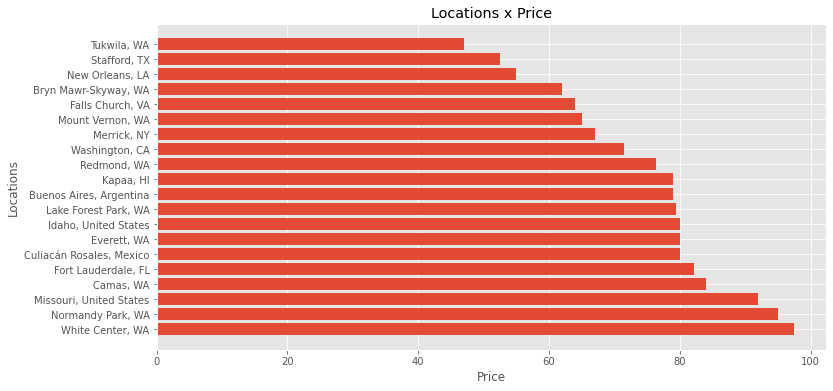

In [81]:
fig, ax = plt.subplots(figsize = (12,6))
plt.style.use('ggplot')

plt.barh(df_hpmql['host_location'],df_hpmql['price'])
plt.title('Locations x Price')
plt.ylabel('Locations')
plt.xlabel('Price')
plt.show()